In [49]:
# Importa as bibliotecas necessárias

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [41]:
path ='C:\\Users\\dsadm\\Desktop\\IABIGDATA - TurmaB\\Formativa\\dados_produtos.csv'
dados =pd.read_csv(path,sep=',') # Comando para ler o arquivo csv da base de dados

In [40]:
dados.head() # Exibe as primeiras linhas do dataframe

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [39]:
dados.tail() # Exibe as últimas linhas do dataframe

,product_name,rating,rating_count,purchased
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1
99,iPod,4.08,533,0


In [37]:
dados.info() # Exibe informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [36]:
dados.describe() # Exibe informações estatísticas do dataframe 

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


Text(0, 0.5, 'rating')

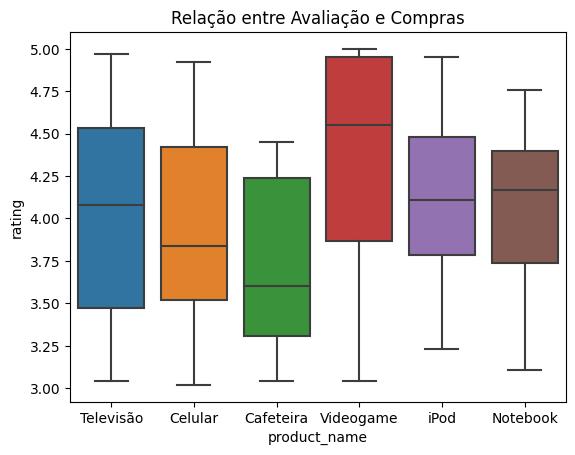

In [31]:
# Criação do Boxplot que relaciona as Avaliações e as Compras de Produtos

sns.boxplot(x=dados['product_name'], y=dados['rating'])
plt.title('Relação entre Avaliação e Compras')
plt.xlabel('product_name')
plt.ylabel('rating')

In [32]:
# Lidando com Dados Nulos

dados.rating.value_counts()

rating
3.04    3
4.24    3
4.68    3
4.42    2
3.76    2
       ..
3.46    1
4.96    1
3.75    1
3.39    1
3.30    1
Name: count, Length: 82, dtype: int64

In [46]:
# Substituição dos valores vazios por nan

dados = dados.replace('', np.nan)

In [47]:
# Realizando a Soma dos Valores Vazios

print(dados.isnull().sum())

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64


In [52]:
# Transformando as colunas do DataFrame em Arrays para fazer a divisão dos conjuntos de dados em treinamento e teste

rating = np.array(dados['rating'])
purchased = np.array(dados['purchased'])

rating_train, rating_test, prodName_train, prodName_test = train_test_split(rating.reshape(-1, 1), prodName.reshape(-1, 1), test_size=0.2, random_state=42)

In [53]:
# Cria o Modelo de Machine Learning

modelo = DecisionTreeClassifier()

In [54]:
# Treinamento do Modelo

modelo.fit(rating_train, prodName_train)

DecisionTreeClassifier()

TypeError: can only concatenate str (not "float") to str

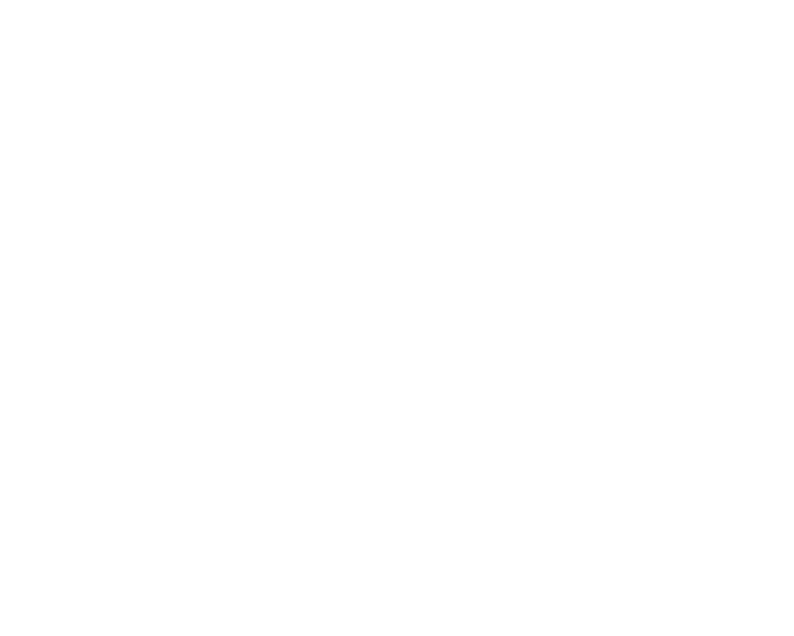

In [55]:
# Plotar Figura da Árvore de Decisão

fig = plt.figure(figsize=(10, 8))
tree.plot_tree(modelo, feature_names=prodName.tolist(), class_names=rating.tolist(), filled=True)